# " Building a State Space Maze Search in Python : BFS"
> " Building a State Space Maze Search in Python using breadth first search and visualizing the search using matplotlib"

- author: Bhargav Lad
- toc: true 
- badges: true
- comments: true
- image: images/maze.jpg
- categories: [ jupyter,matplotlib,BFS,Breadth-first-search]

In this notebook we will use breath first search(BFS) to find solution for the given Maze.
We will start by importing the libraries required for the code.

- `clear_output` -  used to clear cell output
- `matplotlib.pyplot` - use to plot the maze path
- `%matplotlib inline` - to properly format matplotlib output inside jupyter notebook

In [1]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

We will start by reading the maze file and reading it into python list with preprocessing

here we will substitue % and . with number so that matplotlib can correcly render the maze

- `%` is substituted as `0`
- `  ` is substituted as `2`


In [ ]:
!cat BigMaze.txt

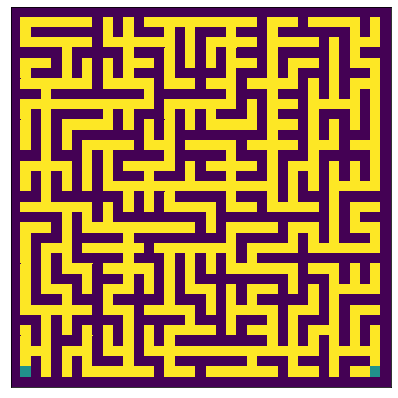

In [2]:
file_name = "BigMaze.txt"
maze = []
start = None
stop = None
with open(file_name, 'r') as file:
    for i,line in enumerate(file):
        line = line.rstrip()
        row = []
        for j,c in enumerate(line):
            if c=='P':
                start = (i,j)  # start
                row.append(1)
            elif c=='.':
                stop = (i,j)  # stop
                row.append(1)
            elif c == '%':
                row.append(0) #  % are 0s
            else:
                row.append(2) #  spaces are 1s
        maze.append(row)

ROW = len(maze)
COL = len(maze[0])

fig,ax = plt.subplots(figsize=(7,7))   
ax.pcolor(maze)
ax.set_xticks([]) # remove the tick marks by setting to an empty list
ax.set_yticks([]) # remove the tick marks by setting to an empty list
ax.set_aspect('equal')
ax.invert_yaxis() #invert the y-axis so the first row of data is at the top 

In [3]:
import copy
copy_maze = copy.deepcopy(maze)

In [4]:
ROW,COL

(37, 37)

# Psuedo Code of BFS
```
      BFS (G, s)                   //Where G is the graph and s is the source node
      let Q be queue.
      Q.enqueue( s ) //Inserting s in queue until all its neighbour vertices are marked.

      mark s as visited.
      while ( Q is not empty)
           //Removing that vertex from queue,whose neighbour will be visited now
           v  =  Q.dequeue( )

          //processing all the neighbours of v  
          for all neighbours w of v in Graph G
               if w is not visited 
                        Q.enqueue( w )             //Stores w in Q to further visit its neighbour
                        mark w as visited.
```
source: https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/tutorial/

Here we will use deque datastructure to model queue for out BFS search.

In [5]:
from collections import deque
SZ=7

def BFS(maze,start,stop,WALL):
    q = deque()  # queue of the nodes
    visited = set() # visited set so that we do not visist them again
    parent = dict() # contains parent of each cell from which it is visited
    
    q.append(start)  # add start to the queue
    visited.add(start) # mark start as visited
    parent[start]=start  # parent of start is start as it the first node


    while len(q)>0:
        
        # pop the first element of queue
        f = q.popleft()
        
        # if it is the destination then we can break out of loop
        if f==stop:
            print("Found Path")
            break;
            

        # get all the 4 neighbours of f
        top = (f[0]-1,f[1]+0)
        bottom = (f[0]+1,f[1]+0)
        left = (f[0]+0,f[1]-1)
        right = (f[0]+0,f[1]+1)

        # add all the valid neighbours that are not yet visited to the queue
        for pos in [top,bottom,left,right]:
            if -1<pos[0]<ROW and -1<pos[1]<COL and maze[pos[0]][pos[1]]!=WALL and pos not in visited:
                q.append(pos)
                visited.add(pos)
                parent[pos]=f
                
                # Code to display visited cell
                clear_output(wait=True)
                copy_maze[pos[0]][pos[1]]=1;
                fig,ax = plt.subplots(figsize=(SZ,SZ)) 
                ax.pcolor(copy_maze)
                ax.set_xticks([]) # remove the tick marks by setting to an empty list
                ax.set_yticks([]) # remove the tick marks by setting to an empty list
                ax.set_aspect('equal')
                ax.invert_yaxis() #invert the y-axis so the first row of data is at the top 
                
                plt.show()
                

    # code to get the actual path
    p = stop
    path = [p]
    while parent[p]!=p:
        p = parent[p]
        path.append(p)
        
    return path



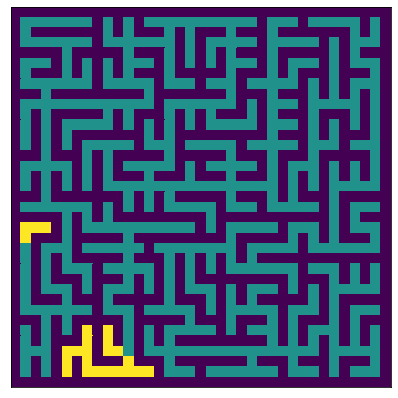

Found Path


In [6]:
bfs_path = BFS(maze,start,stop,0)

In [7]:
for p in bfs_path:
    maze[p[0]][p[1]]=1

Text(0.5, 1.0, 'Final BFS Path')

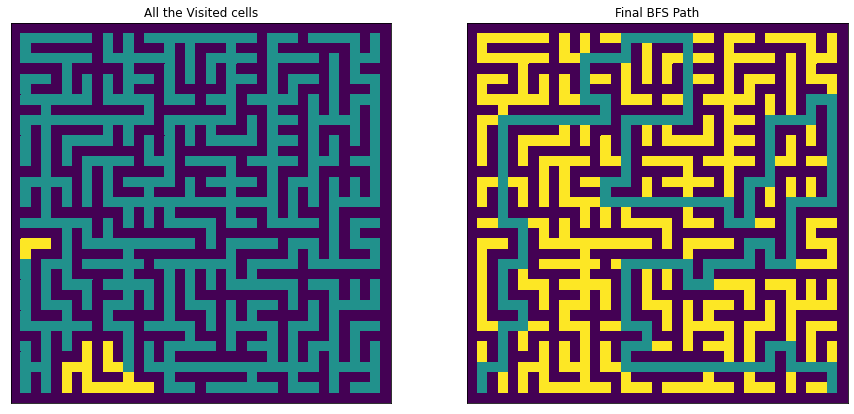

In [8]:
# fig,ax = plt.subplots(1,1,figsize=(SZ,SZ))  
SZ=15
fig,ax = plt.subplots(1,2,figsize=(SZ,SZ))   
ax[0].pcolor(copy_maze)
ax[0].set_xticks([]) # remove the tick marks by setting to an empty list
ax[0].set_yticks([]) # remove the tick marks by setting to an empty list
ax[0].set_aspect('equal')
ax[0].invert_yaxis() #invert the y-axis so the first row of data is at the top 
ax[0].set_title("All the Visited cells")

ax[1].pcolor(maze)
ax[1].set_xticks([]) # remove the tick marks by setting to an empty list
ax[1].set_yticks([]) # remove the tick marks by setting to an empty list
ax[1].set_aspect('equal')
ax[1].invert_yaxis() #invert the y-axis so the first row of data is at the top 
ax[1].set_title("Final BFS Path")